# About
Educational project for classification of the well-known dataset 'Mnist' for handwritten digits.

# Import modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Visualize data

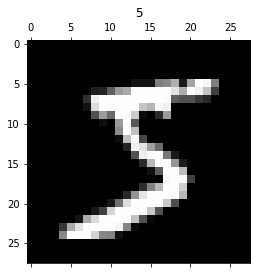

In [3]:
plt.matshow(X_train[0], cmap='gray')
plt.title(y_train[0]);

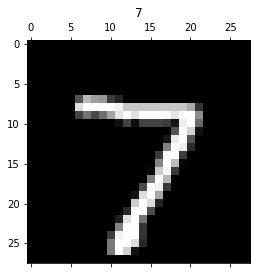

In [4]:
plt.matshow(X_test[0], cmap='gray')
plt.title(y_test[0]);

# Classify

## Example ANN 1

In [5]:
# 10 means 10 output numbers
# 28*28 means flattening of handwritten images
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)), #flatten input layer    
    keras.layers.Dense(10, activation='sigmoid') #output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 609us/step - loss: 9.7473 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 1s 586us/step - loss: 6.2208 - accuracy: 0.8774
Epoch 3/5
1875/1875 [==============================] - 1s 613us/step - loss: 5.5858 - accuracy: 0.8837
Epoch 4/5
1875/1875 [==============================] - 1s 604us/step - loss: 5.5286 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 1s 583us/step - loss: 5.2441 - accuracy: 0.8866


## Example ANN 2

In [6]:
# 10 means 10 output numbers
# 28*28 means flattening of handwritten images
model_2 = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)), #flatten input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation='sigmoid') #output layer
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 763us/step - loss: 2.9730 - accuracy: 0.8577
Epoch 2/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.4009 - accuracy: 0.9051
Epoch 3/5
1875/1875 [==============================] - 1s 721us/step - loss: 0.2883 - accuracy: 0.9259
Epoch 4/5
1875/1875 [==============================] - 1s 728us/step - loss: 0.2623 - accuracy: 0.9335
Epoch 5/5
1875/1875 [==============================] - 1s 752us/step - loss: 0.2305 - accuracy: 0.9410


## Example 3 Logistic regression

## Evaluate model on test data

In [7]:
# evaluate model on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 551us/step - loss: 5.7245 - accuracy: 0.8936


[5.724455833435059, 0.8935999870300293]

In [8]:
# evaluate model on test data
model_2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 599us/step - loss: 0.2698 - accuracy: 0.9317


[0.2698148787021637, 0.9316999912261963]

# Confusion matrix

In [9]:
y_predicted = model.predict(X_test)
y_predicted_2 = model_2.predict(X_test)

313/313 [==============================] - 0s 539us/step


In [10]:
print(y_predicted[0]) #prints 10 numbers, the highest number corresponds to output
print(np.argmax(y_predicted[0]))
print(y_test[0])

[1.8136755e-31 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 9.9999970e-01 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
3
7


Text(767.7272727272725, 0.5, 'True')

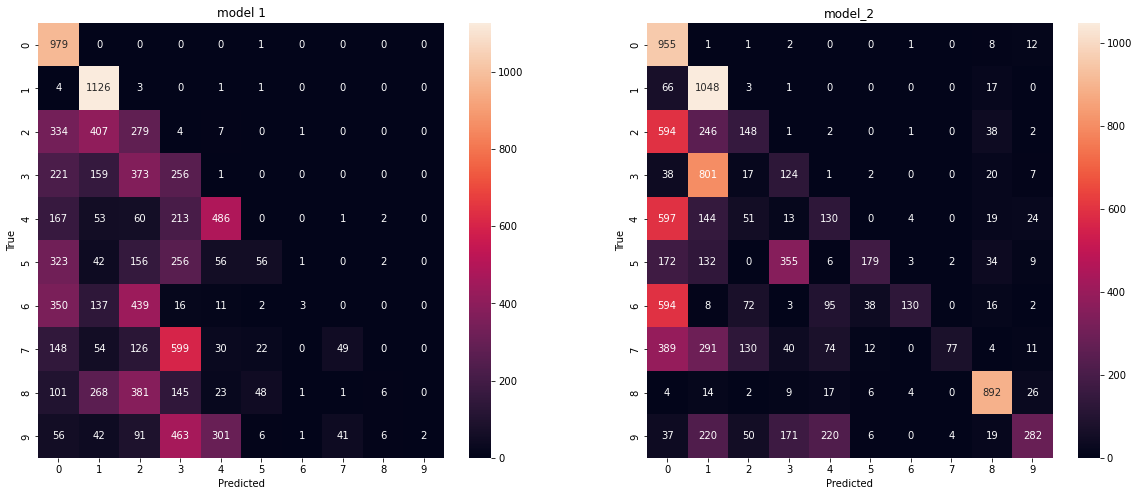

In [11]:
# create confusion matrix (CM)
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted_2 = [np.argmax(i) for i in y_predicted_2]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)
cm_2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_2)

# visualize CM
import seaborn as sn
plt.figure(figsize=(20,8))
# cm for model 1
plt.subplot(1,2,1)
sn.heatmap(cm, annot=True, fmt='d')
plt.title('model 1')
plt.xlabel('Predicted')
plt.ylabel('True')
# cm for model 2
plt.subplot(1,2,2)
sn.heatmap(cm_2, annot=True, fmt='d')
plt.title('model_2')
plt.xlabel('Predicted')
plt.ylabel('True')